# K Nearest Neighbors with Python


## Import Libraries



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Get the Data

Set index_col=0 to use the first column as the index.

In [58]:
df = pd.read_csv("Classified Data",index_col=0)

In [59]:
df

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


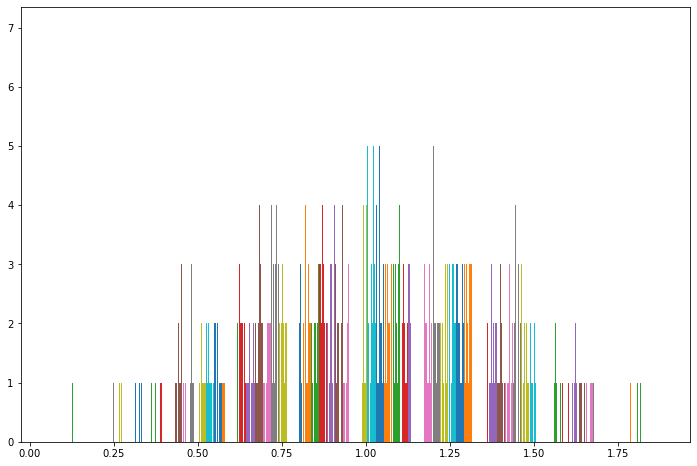

In [62]:
plt.figure(figsize=(12,8))
plt.hist(df.drop('TARGET CLASS',axis=1))
plt.show()

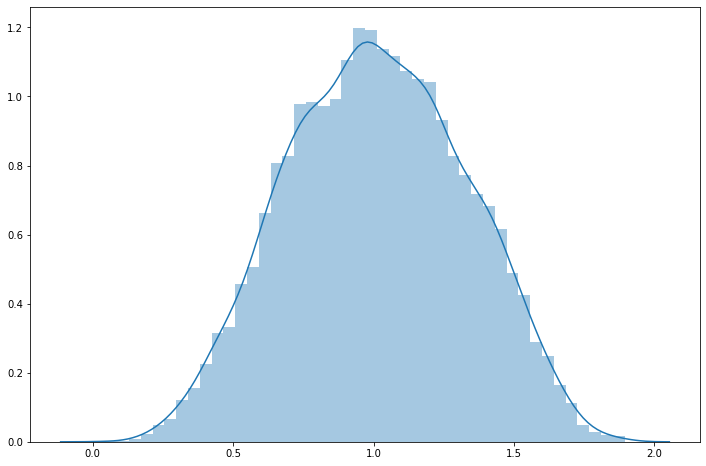

In [63]:
plt.figure(figsize=(12,8))
sns.distplot(df.drop('TARGET CLASS',axis=1))

## Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

![Title](img/Standardization.gif)

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
scaler = StandardScaler()

In [66]:
scaled_features = scaler.fit_transform(df.drop('TARGET CLASS',axis=1))
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [105]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
...,...,...,...,...,...,...,...,...,...,...
995,0.211653,-0.312490,0.065163,-0.259834,0.017567,-1.395721,-0.849486,-2.604264,-0.139347,-0.069602
996,-1.292453,-0.616901,0.369613,0.482648,1.569891,1.273495,0.362784,-1.242110,-0.679746,1.473448
997,0.641777,-0.513083,-0.179205,1.022255,-0.539703,-0.229680,-2.261339,-2.362494,-0.814261,0.111597
998,0.467072,-0.982786,-1.465194,-0.071465,2.368666,0.001269,-0.422041,-0.036777,0.406025,-0.855670


(array([[  0.,  16.,  89., 250., 253., 235., 123.,  33.,   1.,   0.],
        [  0.,  25.,  94., 201., 279., 248., 127.,  24.,   2.,   0.],
        [  0.,   7., 100., 254., 254., 228., 114.,  39.,   4.,   0.],
        [  1.,  11.,  93., 227., 310., 203., 125.,  23.,   3.,   4.],
        [  1.,  25.,  96., 193., 304., 243., 103.,  35.,   0.,   0.],
        [  0.,  17.,  88., 227., 289., 223., 122.,  30.,   4.,   0.],
        [  0.,  13.,  94., 237., 283., 234.,  99.,  35.,   5.,   0.],
        [  0.,  18.,  97., 220., 277., 233., 128.,  27.,   0.,   0.],
        [  0.,  17., 109., 216., 249., 246., 145.,  18.,   0.,   0.],
        [  7.,  16.,  93., 198., 278., 265., 123.,  20.,   0.,   0.]]),
 array([-3.54214006, -2.77282391, -2.00350776, -1.23419161, -0.46487545,
         0.3044407 ,  1.07375685,  1.843073  ,  2.61238916,  3.38170531,
         4.15102146]),
 <a list of 10 Lists of Patches objects>)

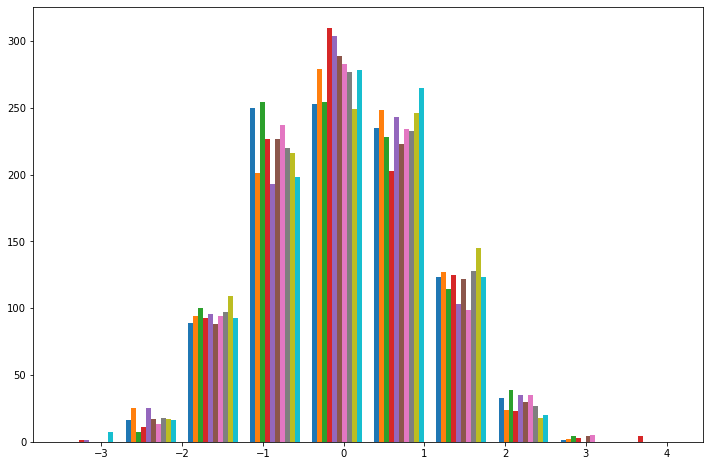

In [68]:
plt.figure(figsize=(12,8))
plt.hist(scaled_features)

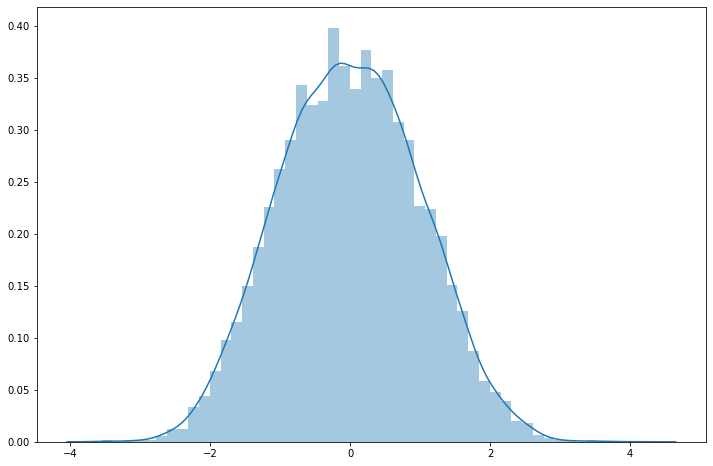

In [69]:
plt.figure(figsize=(12,8))
sns.distplot(scaled_features)

## Train Test Split

In [86]:
from sklearn.model_selection import train_test_split

In [106]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.30,random_state=1)

## Using KNN

Remember that we are trying to come up with a model to predict whether someone will TARGET CLASS or not. We'll start with k=1.

In [108]:
from sklearn.neighbors import KNeighborsClassifier

In [109]:
knn = KNeighborsClassifier(n_neighbors=1)

In [110]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [111]:
pred = knn.predict(X_test)
pred

array([0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1], d

In [112]:
knn.score(X_test,y_test)

0.92

## Predictions and Evaluations

Let's evaluate our KNN model!

In [113]:
from sklearn.metrics import confusion_matrix

In [114]:
confusion_matrix(y_test,pred)

array([[147,  14],
       [ 10, 129]], dtype=int64)

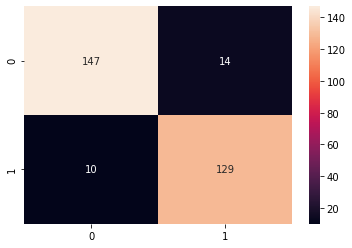

In [115]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='d')

## Choosing a K Value

Let's go ahead and use the elbow method to pick a good K Value:

In [116]:
accuracy_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    score=knn.score(X_test,y_test)
    accuracy_rate.append(score)

In [117]:
accuracy_rate

[0.92,
 0.9133333333333333,
 0.9233333333333333,
 0.9166666666666666,
 0.9166666666666666,
 0.9266666666666666,
 0.9333333333333333,
 0.94,
 0.94,
 0.9466666666666667,
 0.94,
 0.94,
 0.9333333333333333,
 0.9366666666666666,
 0.9366666666666666,
 0.94,
 0.9366666666666666,
 0.94,
 0.94,
 0.9366666666666666,
 0.94,
 0.9333333333333333,
 0.94,
 0.94,
 0.9366666666666666,
 0.9333333333333333,
 0.9366666666666666,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9266666666666666,
 0.93,
 0.9266666666666666,
 0.9333333333333333,
 0.9366666666666666,
 0.9366666666666666,
 0.94,
 0.94,
 0.94]

Text(0, 0.5, 'Accuracy Rate')

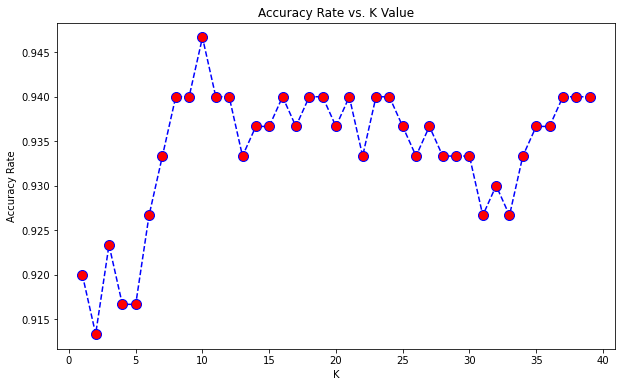

In [96]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

In [97]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    score=knn.score(X_test,y_test)
    error_rate.append(1-score)

In [118]:
error_rate

[0.07999999999999996,
 0.08666666666666667,
 0.07666666666666666,
 0.08333333333333337,
 0.08333333333333337,
 0.07333333333333336,
 0.06666666666666665,
 0.06000000000000005,
 0.06000000000000005,
 0.053333333333333344,
 0.06000000000000005,
 0.06000000000000005,
 0.06666666666666665,
 0.06333333333333335,
 0.06333333333333335,
 0.06000000000000005,
 0.06333333333333335,
 0.06000000000000005,
 0.06000000000000005,
 0.06333333333333335,
 0.06000000000000005,
 0.06666666666666665,
 0.06000000000000005,
 0.06000000000000005,
 0.06333333333333335,
 0.06666666666666665,
 0.06333333333333335,
 0.06666666666666665,
 0.06666666666666665,
 0.06666666666666665,
 0.07333333333333336,
 0.06999999999999995,
 0.07333333333333336,
 0.06666666666666665,
 0.06333333333333335,
 0.06333333333333335,
 0.06000000000000005,
 0.06000000000000005,
 0.06000000000000005]

Text(0, 0.5, 'Error Rate')

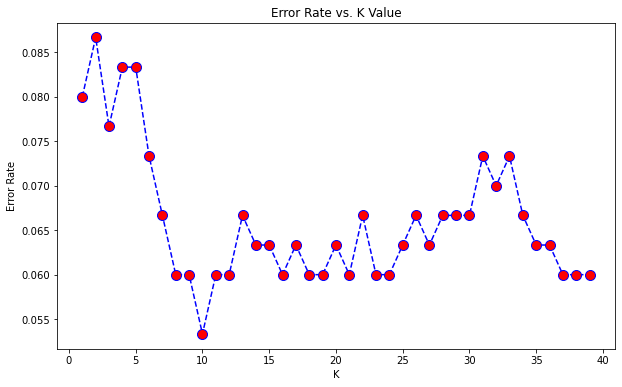

In [98]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Getting The Confusion Matrix

WITH K=1






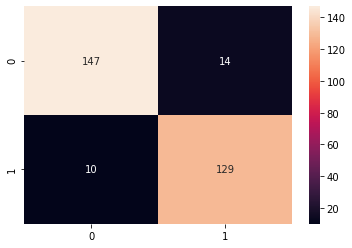

In [99]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='d')
print('\n')


WITH K=10






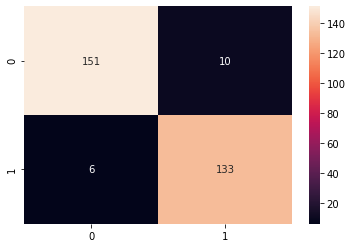

In [102]:
# NOW WITH K=10
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=10')
print('\n')
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='d')
print('\n')


In [103]:
knn.score(X_test,y_test)

0.9466666666666667